In [32]:

import scipy.signal
import matplotlib.pyplot as plt
import bk.load
from fooof import FOOOF
from fooof.sim.gen import gen_aperiodic

In [77]:
bk.load.current_session_linux()
states = bk.load.states()

lfp = bk.load.lfp_in_intervals(bk.load.random_channel('BLA'),states['Rem'])
n = 1250
freqs, spectrum = scipy.signal.welch(lfp.values,1250,nperseg=n,noverlap=n/2)

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713


(0.0, 100.0)

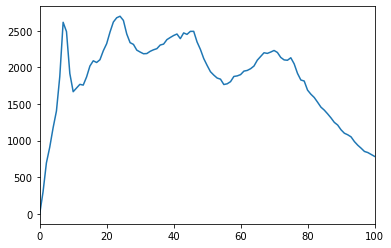

In [78]:
plt.plot(freqs,spectrum*freqs**1.5)
plt.xlim(0,100)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



Text(0.5, 1.0, 'Hpc REM SLEEP')

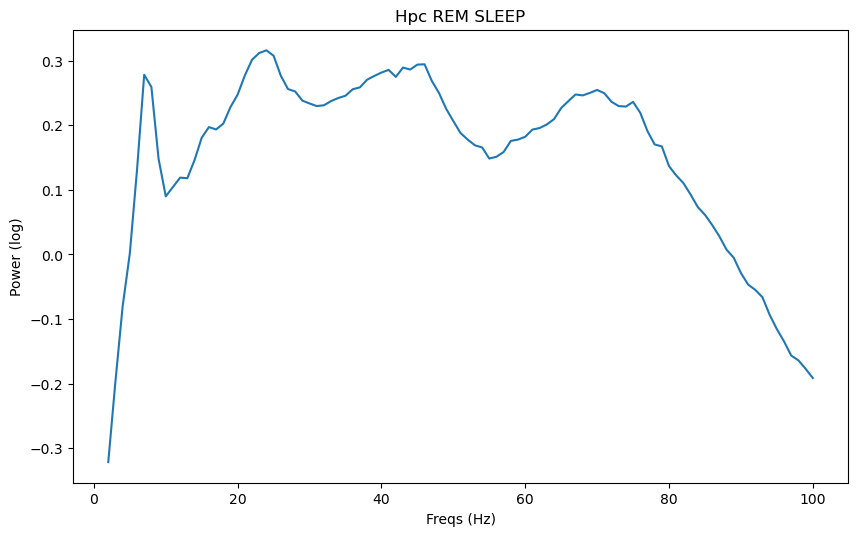

In [80]:
fm = FOOOF()
freq_range = [2,100]
fm.fit(freqs,spectrum,freq_range)
# fm.plot(plot_peaks='line-shade-outline')
# plt.title('BLA REM Sleep')
init_ap_fit = init_ap_fit = gen_aperiodic(fm.freqs, fm._robust_ap_fit(fm.freqs, fm.power_spectrum))
init_flat_spec = fm.power_spectrum - init_ap_fit

fig,ax = plt.subplots(1,1,figsize = (10,6),dpi = 100)
plt.plot(fm.freqs,init_flat_spec)
plt.ylabel('Power (log)')
plt.xlabel('Freqs (Hz)')
plt.title('Hpc REM SLEEP')

Text(0.5, 1.0, 'Hpc REM SLEEP')

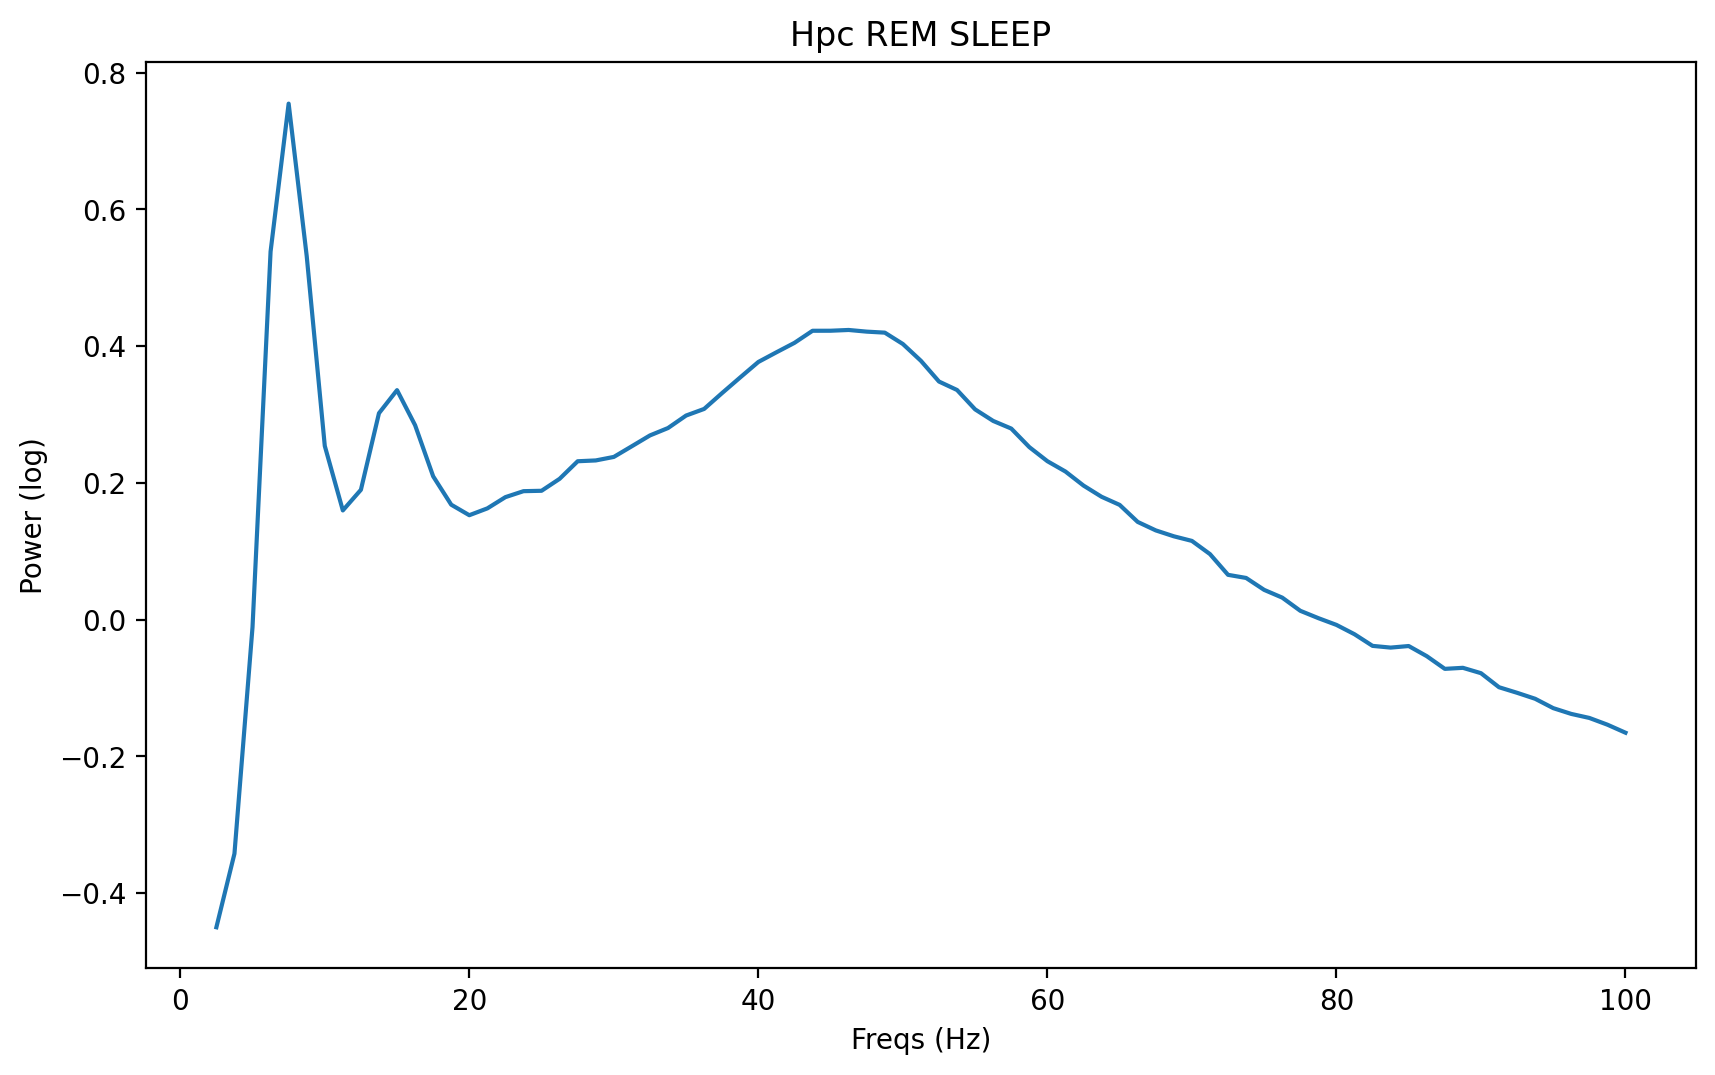

(0.0, 100.0)

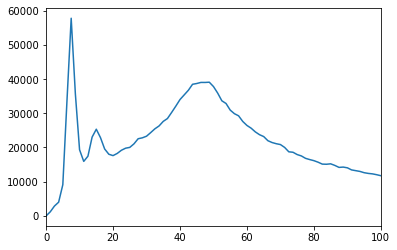